In [40]:
import re
import os
import gzip
import time
import matplotlib.pyplot as plt
directory = "Practice_02_data/"


In [51]:
#### Cell of all my function

def list_file_data(nom_directory):
    myListFile = []
    for f in os.listdir(nom_directory):
        if os.path.isdir(f): # si f est un dossier
            os.chdir(f) # On va lister son contenu
            parse()
            os.chdir('../') # On revient au répertoire précédent
        else:
            myListFile.append(f)
        # Traitement sur le fichier f
    return myListFile


def preprocesDataFile(fileName):
    #list_char = ["_", ":", "/", "!", "?", "#", "^", "*", "~", "&", "(", ")", "[", "]", "{", "}", "'", ";", '"', "$","%", "|",",", ".","-" ]
    input_file = gzip.open(fileName, 'rb')
    full_text = input_file.read()
    docListNum = re.findall('<doc><docno>(.*?)</docno>(.*?)</doc>', str(full_text).lower().strip())
    list_doc = re.findall('<doc><docno>(.*?)</docno>', str(full_text).strip())
    return docListNum, list_doc

def clean(text1,remove_w,stw ):
    #full_text = text1.replace('\\n', '').strip(list_char).replace("''",' ').replace("'",' ')
    full_text = text1.replace('\\n', '').strip(remove_w).replace("''",' ').replace("'",' ')
    #full_text = [stemmer.stem(word) for word in full_text.split() if len(word)>1 and word not in stw] ### remove word and applique stemming
    full_text = [word for word in full_text.split() if len(word)>1 and word not in stw] ### remove word and applique stemming
    return ' '.join(full_text)

def countWord(words):   
    word_count = {} # compte l'occurance d'un terme dans tous les documents
    j=0
    for word in words: # On nparcours la listes de mots
        j+=1
        word  = word.lower()
        if (len(word)==1) or str(word).isnumeric():
            continue
        if not word in word_count:
            word_count[word] = 1
        else:
            word_count[word] = word_count[word] + 1
    return word_count

def countWordIntoDocs(dico, docno, posting):
    docname = docno
    
    for word, frequence in dico.items():
        posting.setdefault(word,[]).append((docname,frequence)) ### Remplace les lignes de commande suivante:
        """
        if not word in list(posting.keys()):
            posting[word] = [(docname, frequence)]
        else:
            posting[word].append((docname, frequence))
        """
    return posting

def document_lenght(list_terms,posting_list):
    dl = {}
    for doc, value in list_terms.items():
        somme_tf = 0
        for term in value:
            for val in sorted(posting_list[term]):
                if val[0]==doc:
                    somme_tf+=val[1]
        dl[doc]=somme_tf
        return dl
    
def vocabulary_size(posting_list):
    return len(posting_list.keys())

def collection_term_freq(posting_list):
    c_size={}
    for k,v in posting_list.items():
        somme=0
        for _,f in v: 
            somme+=f
        dl[k]=somme
        
## Pour avoir une courbe avec le plot
def plot_fonction(x,y, title, label_x, label_y):
    plt.plot(x,y, color='blue',marker='o',linestyle='solid')
    #Titre
    plt.title(title)
    # label
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()

In [42]:
### Cell to initialise variable
#def init_variable():
list_data = list_file_data(directory)
list_data = sorted(list_data)
list_char = "_:/!?#^*~&()[]{}';$%|,.-"
posting_list = {}
posting_list_global = {}
file_indexing_infos = {}
dl = {}
tf = {}
x_axis = list()
y_time = list()
list_terms = {}
stemmer = PorterStemmer()

In [43]:
#def exerccice2(list_data, remove_elements=list()):
for index in range(len(list_data)):
    start = time.time()
    list_terms.clear()
    posting_list.clear()
    fileName = str(directory+list_data[index])#'01-Text_Only-Ascii-Coll-1-10-NoSem.gz'
    docListNum, list_doc = preprocesDataFile(fileName)
    size = os.path.getsize(fileName)

    for i in range(len(list_doc)):
        text_clean = clean(docListNum[i][1], list_char, list())
        list_terms[list_doc[i]] = text_clean.split() # Here we create a dictionary of 
        #list_terms[list_doc[i]] = docListNum[i][1].replace('\\n', '').split() # Here we create a dictionary of 
                                                                              # each docments with its terms
        lt = text_clean.split()
        current_dico = countWord(lt)
        posting_list = countWordIntoDocs(current_dico, list_doc[i], posting_list)

    file_number = fileName.replace('Practice_02_data/','').split('-',1)
    end = time.time()
    elapsed = end - start
    tf[file_number[0]] = [(i, len(i)) for i in posting_list.keys()]
    dl[file_number[0]] = document_lenght(list_terms,posting_list) 
    file_indexing_infos[file_number[0]]=(round(elapsed,3),tf[file_number[0]])




['hercule', 'poirot10002436856512008-10-07t16:45:26zlightmouse4469495hercule', 'poirot', 'charactersfictional', 'private', 'investigatorshercule', 'poirotseries', 'of', 'booksinfobox', 'characterprivate', 'dectective', 'former', 'retired', 'detective', 'former', 'police', 'officercurtain', 'david', 'suchetpeter', 'ustinovalbert', 'finneysee', 'belowpolice', 'officeragatha', 'christieroman', 'catholicdedee2belgianhercule', 'poirotmalethe', 'mysterious', 'affair', 'at', 'styles', 'poirot', 'redirects', 'here.', 'for', 'the', 'tv', 'series,', 'see', 'agatha', 'christie', 'poirot.hercule', 'poirot', '(pronounced', 'in', 'french)', 'is', 'fictional', 'belgian', 'detective', 'created', 'by', 'agatha', 'christie.', 'along', 'with', 'miss', 'marple,', 'poirot', 'is', 'one', 'of', 'christie', 'most', 'famous', 'and', 'long-lived', 'characters:', 'he', 'appeared', 'in', '33', 'novels', 'and', '51', 'short', 'stories.', 'poirot', 'has', 'been', 'portrayed', 'on', 'screen,', 'for', 'films', 'and',

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



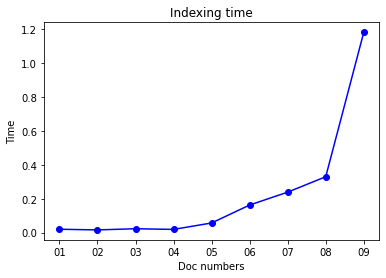

In [44]:
for key, values in file_indexing_infos.items():
    x_axis.append(key)
    y_time.append(values[0])

plot_fonction(x_axis, y_time, "Indexing time", "Doc numbers","Time")

In [45]:
### Exo 1*µ


In [46]:
### Stopword
from stop_words import get_stop_words as g_sw

In [47]:
stopwords = g_sw('english')

['hercule', 'poirot10002436856512008-10-07t16:45:26zlightmouse4469495hercule', 'poirot', 'charactersfictional', 'private', 'investigatorshercule', 'poirotseries', 'booksinfobox', 'characterprivate', 'dectective', 'former', 'retired', 'detective', 'former', 'police', 'officercurtain', 'david', 'suchetpeter', 'ustinovalbert', 'finneysee', 'belowpolice', 'officeragatha', 'christieroman', 'catholicdedee2belgianhercule', 'poirotmalethe', 'mysterious', 'affair', 'styles', 'poirot', 'redirects', 'here.', 'tv', 'series,', 'see', 'agatha', 'christie', 'poirot.hercule', 'poirot', '(pronounced', 'french)', 'fictional', 'belgian', 'detective', 'created', 'agatha', 'christie.', 'along', 'miss', 'marple,', 'poirot', 'one', 'christie', 'famous', 'long-lived', 'characters:', 'appeared', '33', 'novels', '51', 'short', 'stories.', 'poirot', 'portrayed', 'screen,', 'films', 'tv,', 'various', 'actors', 'including', 'albert', 'finney,', 'peter', 'ustinov,', 'ian', 'holm,', 'tony', 'randall,', 'alfred', 'mo

['saginaw,', 'michigan1190002435343852008-10-06t22:44:04znyttend1960810articles', 'expanded', 'since', 'june', '2008saginaw,', 'michigancities', 'michigansettlements', 'established', '1819all', 'articles', 'expandedcounty', 'seats', 'michigansaginaw', 'county,', 'michiganinfobox', 'weather2808213saginaw,', 'michigan5627184485-763.221263.4711932.53.211-7333.651343733566-161152.33482959892.25114819-6536716624840212.583.2nov', '2007-5232.52.44438631.85667913weatherbase292.20823226infobox', 'settlementgnis', 'feature', 'id58445.218573083zip', 'code20630056est58joyce', 'sealsdarnell', 'earley-4city3542.9saginaw18.2fips', 'code101', 'e7location', 'saginaw', 'within', 'saginaw', 'county,', 'michigan20071367435626348601,', '48602,', '48605,', '486071409851782517.41819989bottomcountrymayor162702031countystate26-705206wedtcity', 'managersettledunited', 'statesn3hpim4356.jpgmichiganhttp://www.saginaw-mi.com0.7incorporated1.9view', 'downtown', 'saginaw', 'bearinger', 'building-547.1michigansaginaw

['fo', 'guang', 'shan3440002399026672008-09-21t01:12:45zsmackbot433328all', 'articles', 'needing', 'style', 'editingfo', 'guang', 'shanbuddhist', 'temples', 'taiwankaohsiungreligious', 'organizations', 'established', '1967wikipedia', 'articles', 'needing', 'style', 'editing', 'september', '2008buddhist', 'ordersthe', 'fo', 'guang', 'shan', 'emblem,', 'used', 'fgs', 'affiliated', 'branch', 'temples', 'organizations.', 'standing', 'buddha', 'represents', '36', 'metre', 'high', '(132', 'ft)', 'statue', 'amitabha', 'buddha', 'monastery', 'grounds.main', 'entrance', 'fo', 'guang', 'shan', 'monastery.', 'seen', 'also', 'blia', 'logo,', 'statue', 'maitreya,', 'statue', 'amitabha', 'far', 'right.fo', 'guang', 'shan', '(chinese:', 'pinyin:', 'fogu', 'ngsh', 'n;', 'literally', 'buddha', 'light', 'mountain', 'international', 'chinese', 'mahayana', 'buddhist', 'monastic', 'order', 'gained', 'worldwide', 'presence,', 'chapters', 'around', 'world.', 'headquarters', 'fo', 'guang', 'shan,', 'located',

['hallmark5490002406908092008-09-24t15:17:44zspbot7016748precious', 'metalsjewellery', 'makingjewelleryplatinumwatcheswikipedia', 'articles', 'needing', 'clarificationgoldsilverpalladiumfor', 'uses,', 'see', 'hallmark', '(disambiguation).a', 'hallmark', 'mark', 'series', 'marks', 'struck', 'items', 'made', 'precious', 'metals', 'platinum,', 'gold,', 'silver', 'nations,', 'palladium.', 'general', 'overviewhallmarks', 'defineda', 'hallmark,', 'official', 'mark', 'series', 'marks', 'struck', 'items', 'made', 'precious', 'metals', 'platinum,', 'gold,', 'silver', 'nations,', 'palladium.', 'general', 'sense,', 'term', 'can', 'also', 'used', 'refer', 'distinguishing', 'characteristic', 'trait.', 'historically,', 'hallmarks', 'applied', 'trusted', 'party:', 'guardians', 'craft', 'nowadays', 'assay', 'office.', 'hallmarks', 'guarantee', 'certain', 'purity', 'fineness', 'metal', 'determined', 'formal', 'metal', '(assay)', 'testing.', 'hallmarks', 'distinguished', 'markshallmarks', 'often', 'conf

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['la', 'sulamite194470002405669742008-09-23t23:59:03zcg2p0b0u8m6414446cantatas1885', 'worksla', 'sulamite', 'scene', 'lyrique', 'emmanuel', 'chabrier', 'words', 'jean', 'richepin', 'solo', 'voice,', 'women', 'chorus', 'orchestra.the', 'text', 'la', 'sulamite', 'based', 'extracts', 'song', 'songs.it', 'first', 'performed', '15', 'march', '1885', 'concerts', 'lamoureux,', 'conducted', 'charles', 'lamoureux', 'mezzo', 'soloist', 'mme', 'marie-helene', 'brunet', 'lafleur', '(the', 'second', 'wife', 'lamoureux),', 'work', 'dedicated.', 're-orchestrated', 'version', 'made', 'composer', '1890', '(with', 'similar', 'dedication)', 'first', 'performed', 'artists', '21', 'february', '1892;', 'manuscript', 'now', 'pierpoint', 'morgan', 'library.chabrier', 'great', 'difficulty', 'finding', 'convincing', 'ending', 'piece,', 'even', 'trying', 'get', 'lamoureux', 'help', 'him.', 'end', 'though', 'pleased', 'work;', 'letter', 'publishers', 'enoch', 'et', 'costallat', 'wrote', 'attached', 'work.', 'diff

['soil', 'ph1060012349375622008-08-29t06:21:23zwgsimon190601organic', 'gardeninggardeningsoil', 'chemistrysoil', 'ph', 'ph', 'soil', 'water.', 'based', 'measurement', 'ph,', 'depends', 'activity', 'hydrogen', 'ions', '(h+)', 'solution.there', 'many', 'different', 'methods', 'collect', 'soil', 'water,', 'influence', 'measured', 'soil', 'ph', 'one', 'way', 'another', '(see', 'below).the', 'soil', 'ph', 'closely', 'linked', 'concepts', 'alkalinity', 'acidity', '(see', 'acid', 'neutralizing', 'capacity).', 'neutral', 'solution', 'ph', 'acid', 'solution', 'ph', 'less', '(more', 'h+', 'oh-)', 'basic', 'solution', 'ph', 'larger', '(more', 'oh-', 'h+)', 'is,', 'contrary', 'popular', 'belief,', 'exact', 'limit', 'ph', 'range.', 'natural', 'soils', 'surface', 'waters', 'buffer', 'systems', 'make', 'ph', 'levels', 'uncommon,', 'impossible.', 'exposure', 'soil', 'sunlight', 'usually', 'affect', 'ph', 'soil.(note:', 'basic', 'solution', 'always', 'ph', 'larger', '7,', 'alkaline', 'solution', '(i.e.

['general', 'association', 'general', 'baptists3410012255074692008-07-14t01:38:34zjohnpacklambert2308770religious', 'organizations', 'established', '1870baptist', 'denominationspart', 'series', 'onbaptistshistorical', 'backgroundchristianity', 'general', 'baptist', 'strict', 'baptistdoctrinal', 'distinctivesprima', 'sola', 'scriptura', 'ordinance', 'offices', 'confessions', 'congregationalism', 'separation', 'church', 'statepivotal', 'figuresjohn', 'bunyan', 'andrew', 'fuller', 'thomas', 'helwys', 'john', 'smyth', 'charles', 'haddon', 'spurgeon', 'roger', 'williams', 'shubal', 'stearnslargest', 'associationsamerican', 'baptist', 'baptist', 'general', 'convention', 'texas', 'national', 'baptist', 'progressive', 'national', 'baptist', 'southern', 'baptist', 'convention', 'asia', 'pacific', 'baptist', 'federation', 'european', 'baptist', 'federationgeneral', 'association', 'general', 'baptists', 'group', 'baptists', 'holding', 'general', 'atonement', '(that', 'christ', 'died', 'persons),'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



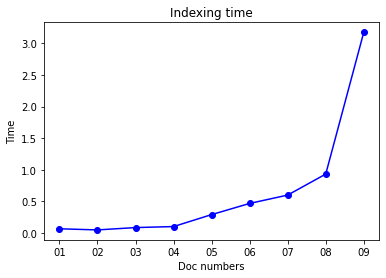

In [48]:
#def exerccice2(list_data, remove_elements=list()):
init_variable()
for index in range(len(list_data)):
    start = time.time()
    list_terms.clear()
    posting_list.clear()
    fileName = str(directory+list_data[index])#'01-Text_Only-Ascii-Coll-1-10-NoSem.gz'
    docListNum, list_doc = preprocesDataFile(fileName)
    size = os.path.getsize(fileName)

    for i in range(len(list_doc)):
        text_clean = clean(docListNum[i][1], list_char, stopwords)
        list_terms[list_doc[i]] = text_clean.split() # Here we create a dictionary of 
        #list_terms[list_doc[i]] = docListNum[i][1].replace('\\n', '').split() # Here we create a dictionary of 
                                                                              # each docments with its terms
        lt = text_clean.split()
        current_dico = countWord(lt)
        posting_list = countWordIntoDocs(current_dico, list_doc[i], posting_list)

    file_number = fileName.replace('Practice_02_data/','').split('-',1)
    end = time.time()
    elapsed = end - start
    tf[file_number[0]] = [(i, len(i)) for i in posting_list.keys()]
    dl[file_number[0]] = document_lenght(list_terms,posting_list) 
    file_indexing_infos[file_number[0]]=(round(elapsed,3),tf[file_number[0]])
_axis = list()
_time = list()
for key, values in file_indexing_infos.items():
    _axis.append(key)
    _time.append(values[0])

plot_fonction(_axis, _time, "Indexing time", "Doc numbers","Time")

In [49]:
# Steming
from nltk.stem import PorterStemmer

In [52]:
#def exerccice2(list_data, remove_elements=list()):
#for index in range(len(list_data)):
start = time.time()
list_terms.clear()
posting_list.clear()
fileName = str(directory+'01-Text_Only-Ascii-Coll-1-10-NoSem.gz')
docListNum, list_doc = preprocesDataFile(fileName)
size = os.path.getsize(fileName)

for i in range(len(list_doc)):
    text_clean = clean(docListNum[i][1], list_char, stopwords)
    list_terms[list_doc[i]] = text_clean.split() # Here we create a dictionary of 
    #list_terms[list_doc[i]] = docListNum[i][1].replace('\\n', '').split() # Here we create a dictionary of 
                                                                          # each docments with its terms
    lt = text_clean.split()
    current_dico = countWord(lt)
    posting_list = countWordIntoDocs(current_dico, list_doc[i], posting_list)

file_number = fileName.replace('Practice_02_data/','').split('-',1)
end = time.time()
elapsed = end - start
tf[file_number[0]] = [(i, len(i)) for i in posting_list.keys()]
dl[file_number[0]] = document_lenght(list_terms,posting_list) 
file_indexing_infos[file_number[0]]=(round(elapsed,3),tf[file_number[0]])
_axis_ = list()
_time_ = list()
for key, values in file_indexing_infos.items():
    _axis_.append(key)
    _time_.append(values[0])
print(len(posting_list))
#plot_fonction(_axis_, _time_, "Indexing time", "Doc numbers","Time")

KeyError: '33'